In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

# Visualisation
import matplotlib.pyplot as plt

# Ease data preprocessing
from sklearn import preprocessing

# Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# PCA
from sklearn.decomposition import PCA

# Import cross-validation tools
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Import metrics to evaluate model performance
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Use model in future
import joblib

In [2]:
# downloading dataset into pandas dataframe
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')

In [3]:
# checking data - all integers
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# data needs standardising
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# managable size
data.shape

(1599, 12)

In [6]:
# different quality count
data.groupby('quality').size()

quality
3     10
4     53
5    681
6    638
7    199
8     18
dtype: int64

In [7]:
# no NAs
data.isna().values.any()

False

In [8]:
# three classes - bad, average and good
targets = []

for q in data['quality']:
    if q <= 4:
        targets.append(1)
    elif q >= 5 and q <= 6:
        targets.append(2)
    elif q >= 7:
        targets.append(3)

data['target'] = targets

In [9]:
# skewed data
data.groupby('target').size()

target
1      63
2    1319
3     217
dtype: int64

In [10]:
# no need of quality now
data = data.drop('quality', axis=1)

In [11]:
# no strong correlation
data.corr()*100

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
fixed acidity,100.000000,-25.613089,67.170343,11.477672,9.370519,-15.379419,-11.318144,66.804729,-68.297819,18.300566,-6.166827,12.588633
volatile acidity,-25.613089,100.000000,-55.249568,0.191788,6.129777,-1.050383,7.647000,2.202623,23.493729,-26.098669,-20.228803,-33.381595
citric acid,67.170343,-55.249568,100.000000,14.357716,20.382291,-6.097813,3.553302,36.494718,-54.190414,31.277004,10.990325,22.893003
residual sugar,11.477672,0.191788,14.357716,100.000000,5.560954,18.704900,20.302788,35.528337,-8.565242,0.552712,4.207544,3.015262
chlorides,9.370519,6.129777,20.382291,5.560954,100.000000,0.556215,4.740047,20.063233,-26.502613,37.126048,-22.114054,-9.882891
free sulfur dioxide,-15.379419,-1.050383,-6.097813,18.704900,0.556215,100.000000,66.766645,-2.194583,7.037750,5.165757,-6.940835,-2.507510
total sulfur dioxide,-11.318144,7.647000,3.553302,20.302788,4.740047,66.766645,100.000000,7.126948,-6.649456,4.294684,-20.565394,-8.196033
density,66.804729,2.202623,36.494718,35.528337,20.063233,-2.194583,7.126948,100.000000,-34.169933,14.850641,-49.617977,-12.356585
pH,-68.297819,23.493729,-54.190414,-8.565242,-26.502613,7.037750,-6.649456,-34.169933,100.000000,-19.664760,20.563251,-9.394627
sulphates,18.300566,-26.098669,31.277004,0.552712,37.126048,5.165757,4.294684,14.850641,-19.664760,100.000000,9.359475,20.540949


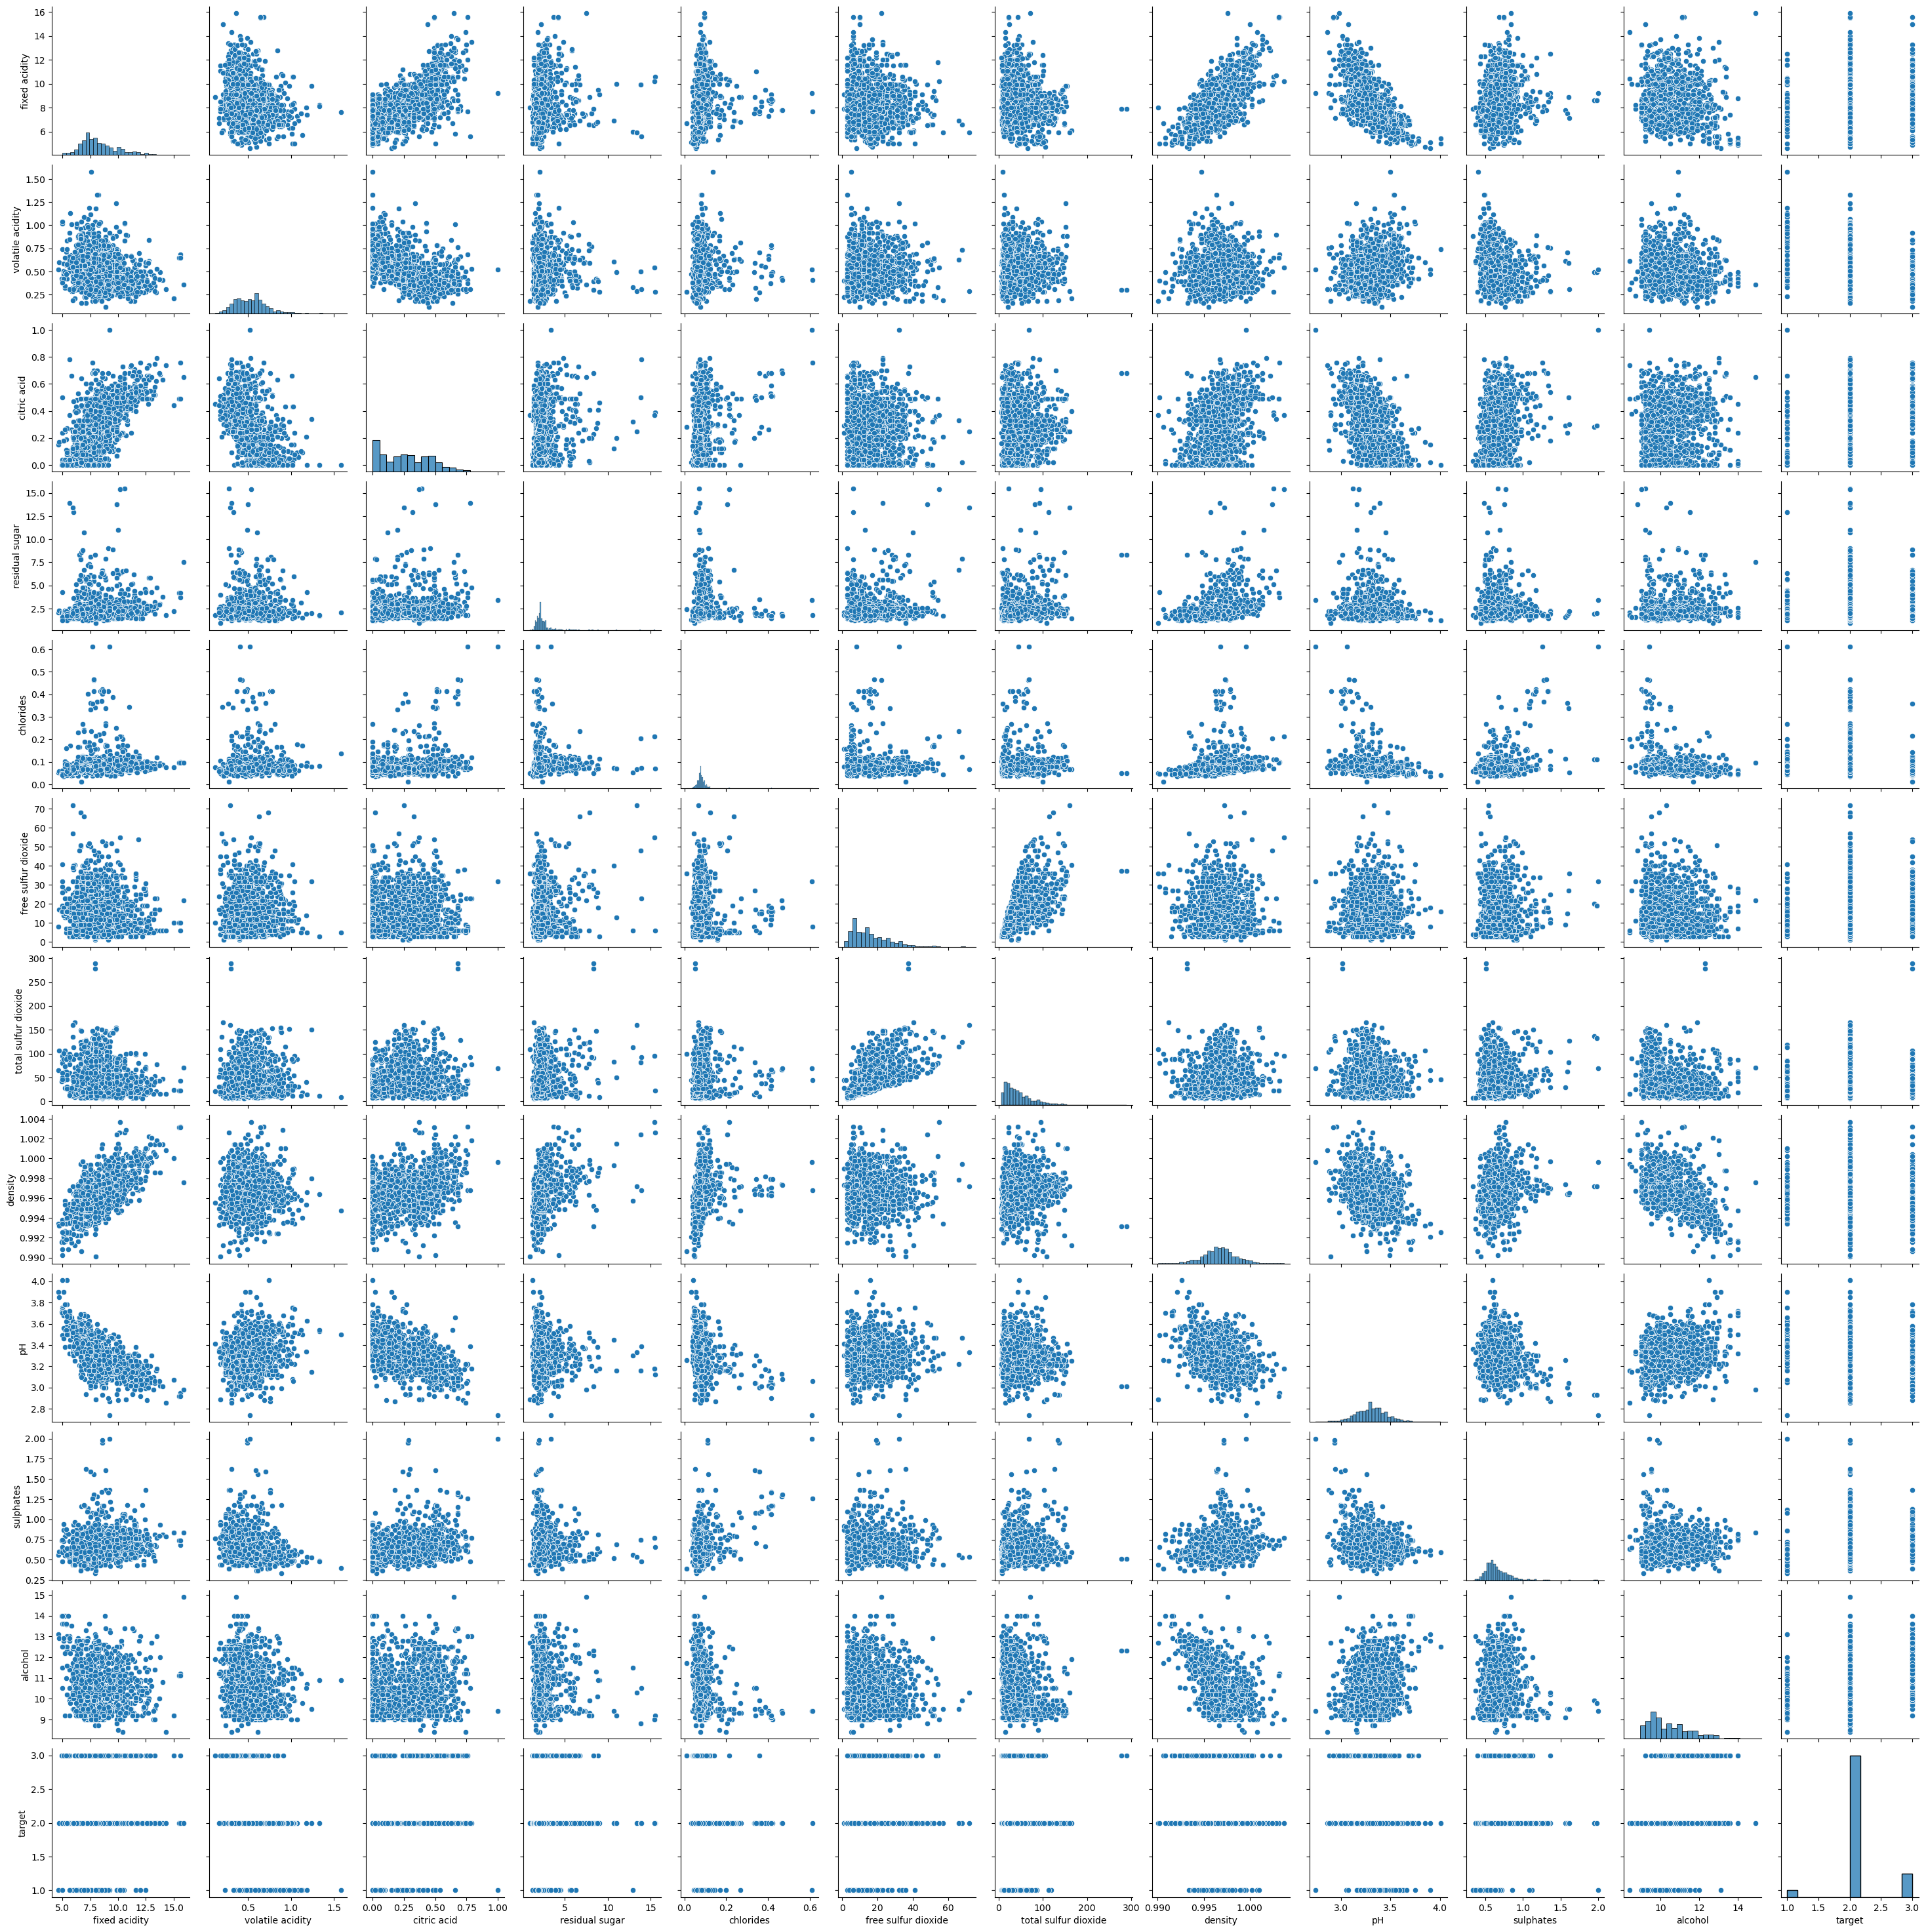

In [40]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

sns.pairplot(data)

In [13]:
# test and train split
y = data.target
X = data.drop(['target'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=123)

In [28]:
# pipelining
pipeline = make_pipeline(preprocessing.StandardScaler(),
                        RandomForestClassifier(n_estimators=100,max_features='sqrt'))

In [29]:
# Removing useless features
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [30]:
# the variance caused by each feature on the dataset
explained_variance = pca.explained_variance_ratio_
for i in explained_variance:
    print(format(i*100, 'f'))

94.547639
5.040344
0.256932
0.155085


In [31]:
# the four first features of our data capture almost 99.5% of the variance
pca = PCA(n_components=4)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [32]:
# hyper parameters for our model
print(pipeline.get_params())

{'memory': None, 'steps': [('standardscaler', StandardScaler()), ('randomforestclassifier', RandomForestClassifier())], 'verbose': False, 'standardscaler': StandardScaler(), 'randomforestclassifier': RandomForestClassifier(), 'standardscaler__copy': True, 'standardscaler__with_mean': True, 'standardscaler__with_std': True, 'randomforestclassifier__bootstrap': True, 'randomforestclassifier__ccp_alpha': 0.0, 'randomforestclassifier__class_weight': None, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_leaf_nodes': None, 'randomforestclassifier__max_samples': None, 'randomforestclassifier__min_impurity_decrease': 0.0, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_weight_fraction_leaf': 0.0, 'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__n_jobs': None, 'randomforestclassifier_

In [35]:
# the hyper parameters we want to tune through cross-validation
hyperparameters = { 'randomforestclassifier__max_features' : ['sqrt', 'log2'],
                   'randomforestclassifier__max_depth' : [None, 10, 7, 5, 3, 1]}

In [36]:
# performs cross-validation across all possible permutations of hyper parameters
clf = GridSearchCV(pipeline, hyperparameters, cv=10)
clf.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [None, 10, 7, 5,
                                                               3, 1],
                         'randomforestclassifier__max_features': ['sqrt',
                                                                  'log2']})

In [37]:
# best parameters
print(clf.best_params_)

{'randomforestclassifier__max_depth': None, 'randomforestclassifier__max_features': 'sqrt'}


In [38]:
# predicting over test set
y_pred = clf.predict(X_test)

In [39]:
# confusion matrix to check how the model classified the different wines on the dataset
print('Accuracy score:', accuracy_score(y_test, y_pred))
print("-"*80)
print('Confusion matrix\n')
conmat = np.array(confusion_matrix(y_test, y_pred, labels=[1,2,3]))
confusion = pd.DataFrame(conmat, index=['Actual 1', 'Actual 2', 'Actual 3'],
                         columns=['predicted 1','predicted 2', 'predicted 3'])
print(confusion)
print("-"*80)
print('Classification report')
print(classification_report(y_test, y_pred, target_names=['1','2', '3'],zero_division=1))

Accuracy score: 0.825
--------------------------------------------------------------------------------
Confusion matrix

          predicted 1  predicted 2  predicted 3
Actual 1            0           12            2
Actual 2            0          249           13
Actual 3            0           29           15
--------------------------------------------------------------------------------
Classification report
              precision    recall  f1-score   support

           1       1.00      0.00      0.00        14
           2       0.86      0.95      0.90       262
           3       0.50      0.34      0.41        44

    accuracy                           0.82       320
   macro avg       0.79      0.43      0.44       320
weighted avg       0.82      0.82      0.79       320

